
*********************100%***********************]  1 of 1 completed

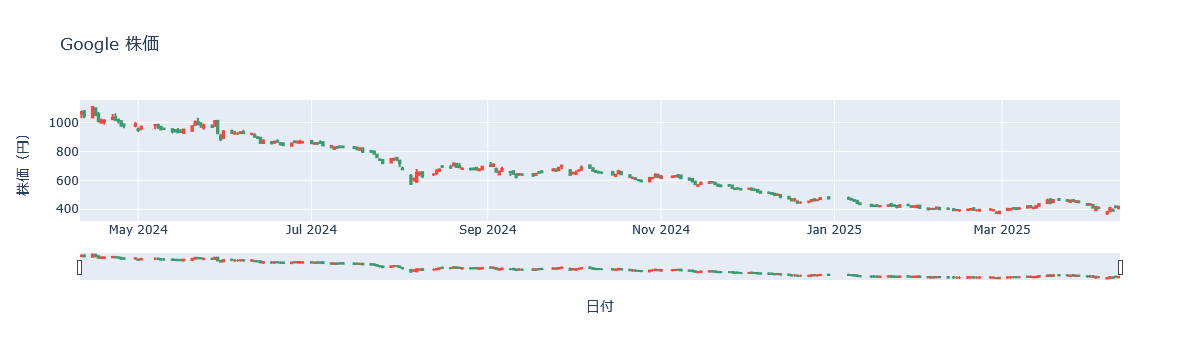

In [10]:
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import yfinance as yf

ticker = "9501.T"
period = "1y"
interval = "1d"
data_df = yf.download(ticker, period=period, interval=interval)
data_df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

fig = go.Figure(data=[
    go.Candlestick(
        x=data_df.index,
        open = data_df.Open, #["Open"]
        high = data_df.High, #["High"]
        low  = data_df.Low, #["Low"]
        close= data_df.Close #["Close"]
    )
])

fig.update_layout(
    title="Google 株価",
    xaxis_title="日付",
    yaxis_title="株価（円）"
)

fig.show()

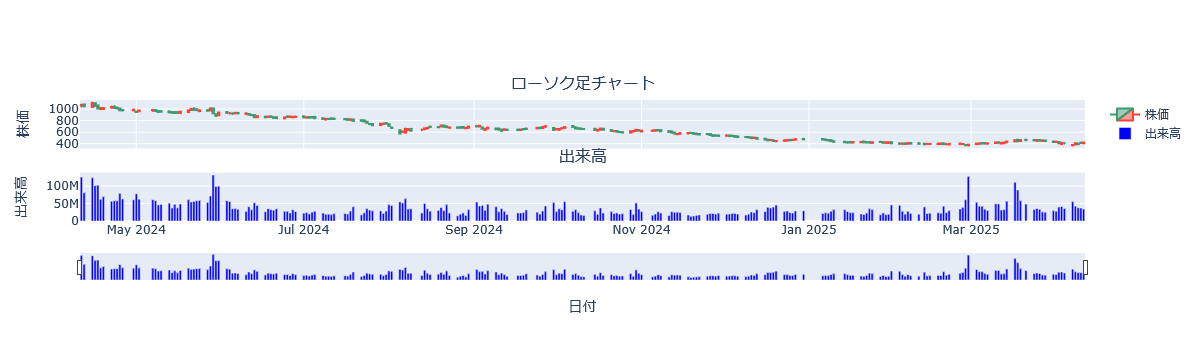

In [11]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True, vertical_spacing=0.2, subplot_titles=("ローソク足チャート","出来高"))

fig.add_trace(go.Candlestick(
        x=data_df.index,
        open = data_df.Open, #["Open"]
        high = data_df.High, #["High"]
        low  = data_df.Low, #["Low"]
        close= data_df.Close,#["Close"]
        name="株価"
    ), row=1,col=1)

fig.add_trace(go.Bar(
        x=data_df.index,
        y=data_df["Volume"],
        marker_color="blue",
        name="出来高"
    ), row=2,col=1)

fig.update_layout(
    xaxis_rangeslider_visible=False,
    xaxis2_rangeslider_visible=True,
    xaxis2_title="日付",
    yaxis_title="株価",
    yaxis2_title="出来高"
)

fig.show()     

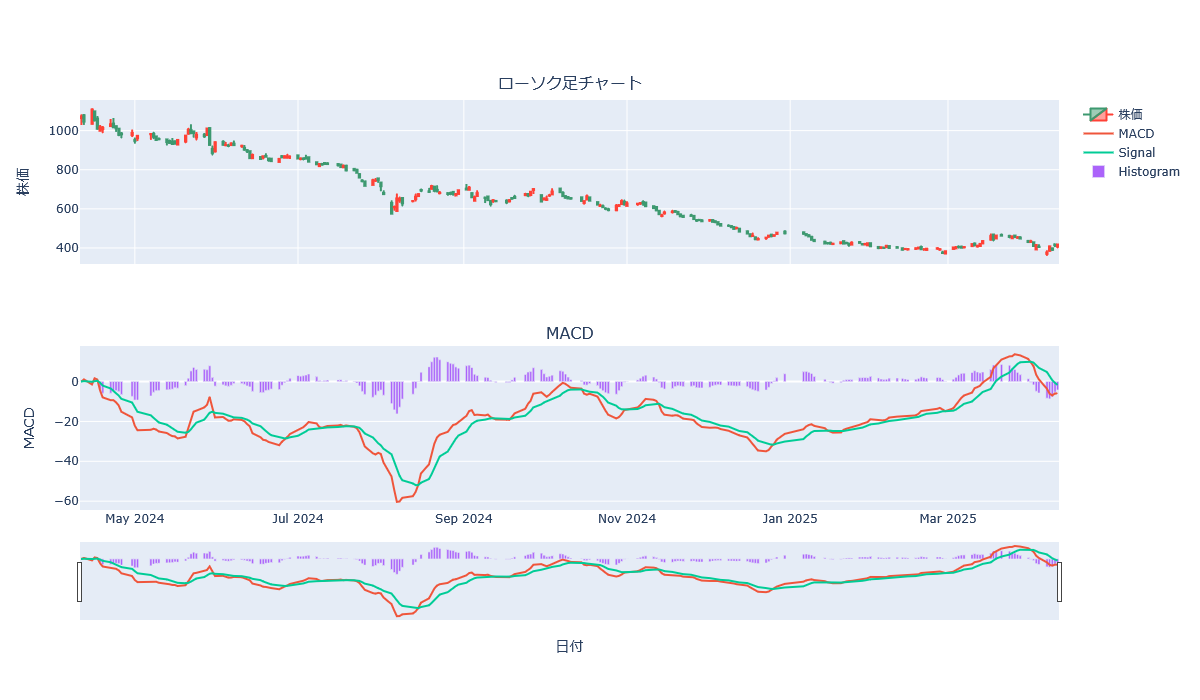

In [14]:
short_ema = data_df["Close"].ewm(span=12, adjust=False).mean()
long_ema = data_df["Close"].ewm(span=26, adjust=False).mean()

macd = short_ema - long_ema

signal = macd.ewm(span=9, adjust=False).mean()

histogram = macd - signal

data_df["MACD"] = macd
data_df["Signal"] = signal
data_df["Histogram"] = histogram
data_df

fig = make_subplots(rows=2, cols=1,shared_xaxes=True, vertical_spacing=0.2, subplot_titles=("ローソク足チャート","MACD")) 

fig.add_trace(go.Candlestick(
        x=data_df.index,
        open = data_df.Open, #["Open"]
        high = data_df.High, #["High"]
        low  = data_df.Low, #["Low"]
        close= data_df.Close,#["Close"]
        name="株価"
    ), row=1,col=1)

fig.add_trace(go.Scatter(x=data_df.index, y=data_df["MACD"], name="MACD", mode="lines"), row=2, col=1)
fig.add_trace(go.Scatter(x=data_df.index, y=data_df["Signal"], name="Signal", mode="lines"), row=2, col=1)
fig.add_trace(go.Bar(x=data_df.index, y=data_df["Histogram"], name="Histogram"), row=2, col=1)

fig.update_layout(
    xaxis_rangeslider_visible=False,
    xaxis2_rangeslider_visible=True,
    xaxis2_title="日付",
    yaxis_title="株価",
    yaxis2_title="MACD",
    height=700
)

fig.show()    

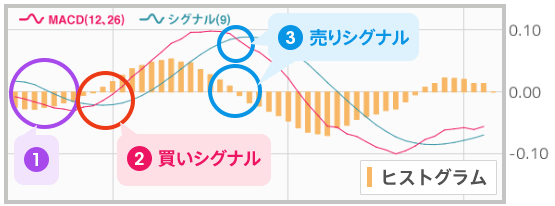